In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import time
import os
from tqdm import tqdm

In [3]:
def imread (img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

In [4]:
def imshow (img, size=(10,10)):
    plt.figure(figsize=size)
    plt.imshow(img, cmap= 'gray')
    plt.show

In [5]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable= False
    results = model.process(image)
    image.flags.writeable =True
    image =cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(thickness=1, color=(80,110,10),circle_radius=1),
                             mp_drawing.DrawingSpec(thickness=1, color=(80,256,121),circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [44]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame =cap.read()
        image, results = mediapipe_detection(frame , holistic)
        draw_landmarks(image, results)
        cv2.imshow("open cv feed",image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [12]:
len(resuls.face_landmarks.landmark)

468

In [46]:
img2= imread('test/frame25.jpg')

In [150]:
type(img2)

numpy.ndarray

In [48]:
img2.shape

(1080, 1920, 3)

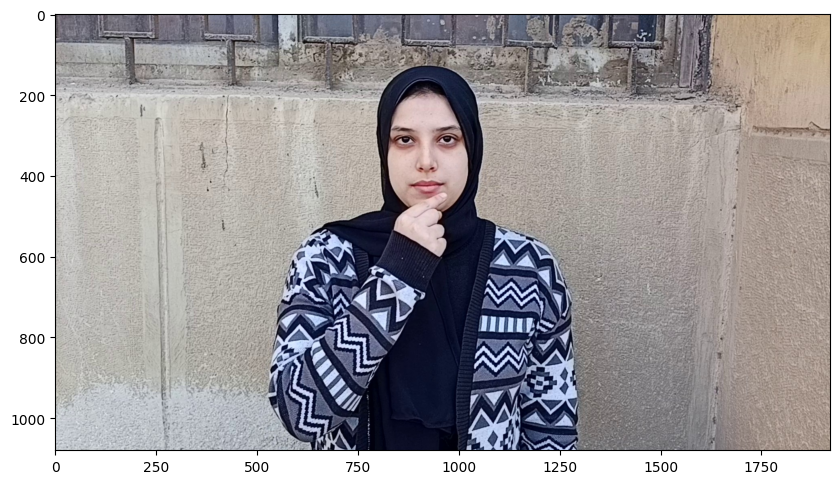

In [149]:
imshow(img2)

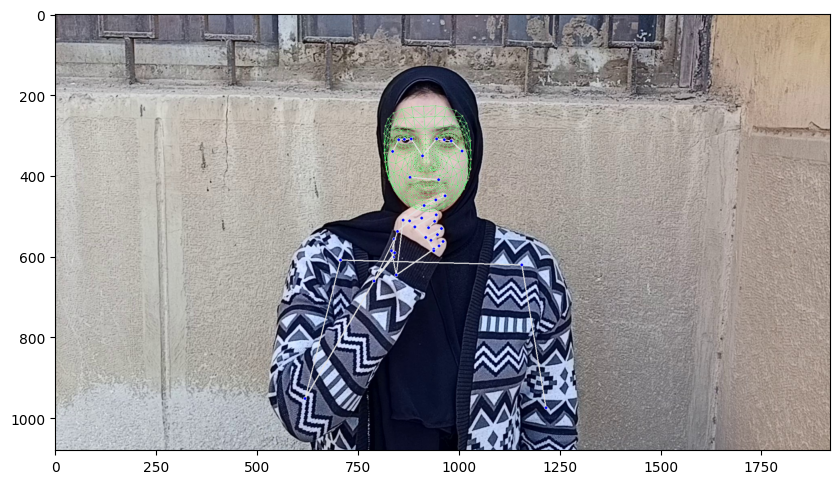

In [50]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    image, results = mediapipe_detection(img2 , holistic)
    draw_landmarks(image, results)
    imshow(image)

In [147]:
def vid_to_img(vid_path,out_path,num_frams=30):
    count = 0
    start =1
    vidcap = cv2.VideoCapture(vid_path)
    success,image = vidcap.read()
    video_length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = int(video_length/num_frams)
    drop = video_length -num_frams*step
    if drop:
        start = int(1/3*drop)
    for i in range(start-1,video_length,step):
        if count<num_frams:
            vidcap.set(cv2.CAP_PROP_POS_FRAMES,(i))                     # get the frame that we want
            cv2.imwrite("%s/frame%d.jpg" %(out_path, count), image)     # save frame as JPEG file      
            success,image = vidcap.read()
            count += 1
        else:
            break

In [123]:
os.mkdir("img_data")

In [ ]:
data_path = '../archive'
for i in tqdm(os.listdir(data_path)):
    count = 0
    os.mkdir(os.path.join("img_data/",i))
    class_path = os.path.join(data_path,i)
    for j in os.listdir(class_path):
        vid_path = os.path.join(class_path,j)
        out_path = ('img_data/'+i+"/%s"%count)
        os.mkdir(out_path)
        vid_to_img(vid_path,out_path,30)
        count+=1
    print('converting: ' + i +' done')
        break

In [1]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [9]:
actions = []
for action in os.listdir('img_data'):
    actions.append(action)

In [11]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(actions)

# Thirty videos worth of data
no_sequences = 97

# Videos are going to be 30 frames in length
sequence_length = 30

In [12]:
for action in actions: 
    for sequence in range(len(os.listdir(os.path.join('img_data',action)))):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [27]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions: 
        for sequence in range(len(os.listdir(os.path.join('img_data',action)))):
            for img in range(sequence_length):
                    frame = imread(os.path.join('img_data',action,str(sequence),("frame"+str(img)+'.jpg')))
                    image, results = mediapipe_detection(frame, holistic)
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(img))
                    np.save(npy_path, keypoints)

In [37]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'adress': 0,
 'and': 1,
 'anise': 2,
 'banana': 3,
 'berell': 4,
 'birth certificate': 5,
 'cinnamon': 6,
 'coffee': 7,
 'cold': 8,
 'deaf': 9,
 'doing': 10,
 'drink': 11,
 'fenugreek': 12,
 'fine': 13,
 'glass': 14,
 'hello': 15,
 'help': 16,
 'hot': 17,
 'How are you': 18,
 'How much': 19,
 'in': 20}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(len(os.listdir(os.path.join('img_data',action)))):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(2062, 30, 1662)

In [101]:
sequences[1]

[array([ 0.47136459,  0.25191826, -0.51946133, ...,  0.42650938,
         0.76485461, -0.01594846]),
 array([ 0.4822678 ,  0.25454164, -0.47436824, ...,  0.42574212,
         0.76492745, -0.01911684]),
 array([ 0.47877952,  0.25443661, -0.48008963, ...,  0.4459649 ,
         0.60680842, -0.04786976]),
 array([ 0.47906256,  0.25107321, -0.46565136, ...,  0.45234624,
         0.48053944, -0.04166156]),
 array([ 0.47531003,  0.25616688, -0.47224638, ...,  0.4556362 ,
         0.38377932, -0.03713943]),
 array([ 0.47550359,  0.26278213, -0.48436034, ...,  0.46534607,
         0.33461884, -0.02643399]),
 array([ 0.4724063 ,  0.26019502, -0.47295666, ...,  0.48177767,
         0.31016815, -0.02474038]),
 array([ 0.47289854,  0.26258969, -0.46885458, ...,  0.45481423,
         0.298325  , -0.03447853]),
 array([ 0.47247872,  0.26292869, -0.46765235, ...,  0.45141092,
         0.29308793, -0.0370495 ]),
 array([ 0.47342336,  0.26685566, -0.49376452, ...,  0.43913233,
         0.26838398, -0.03

In [63]:
np.array(labels).shape

(2062,)

In [77]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(2062, 30, 1662)

In [38]:
y = to_categorical(labels).astype(int)

In [102]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

In [103]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2,random_state=2)

In [104]:
y_test.shape

(619, 21)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dropout

In [106]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(Dropout(0.2))  # Adding dropout for regularization


model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))

model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dropout(0.2))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(actions.shape[0], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)


In [ ]:
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr])

Epoch 1/2000
37/37 [==============================] - 8s 118ms/step - loss: 3.1939 - accuracy: 0.0494 - val_loss: 3.0471 - val_accuracy: 0.0519 - lr: 0.0010
Epoch 2/2000
37/37 [==============================] - 4s 108ms/step - loss: 3.0433 - accuracy: 0.0485 - val_loss: 3.0478 - val_accuracy: 0.0484 - lr: 0.0010
Epoch 3/2000
37/37 [==============================] - 4s 105ms/step - loss: 3.0429 - accuracy: 0.0650 - val_loss: 3.0542 - val_accuracy: 0.0381 - lr: 0.0010
Epoch 4/2000
37/37 [==============================] - 4s 108ms/step - loss: 3.0442 - accuracy: 0.0520 - val_loss: 3.0498 - val_accuracy: 0.0484 - lr: 0.0010
Epoch 5/2000
37/37 [==============================] - 4s 107ms/step - loss: 3.0431 - accuracy: 0.0572 - val_loss: 3.0499 - val_accuracy: 0.0277 - lr: 0.0010
Epoch 6/2000
37/37 [==============================] - 4s 110ms/step - loss: 3.0434 - accuracy: 0.0511 - val_loss: 3.0514 - val_accuracy: 0.0277 - lr: 0.0010
Epoch 7/2000
37/37 [==============================] - 4s 1

In [90]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [93]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
46/46 [==============================] - 21s 352ms/step - loss: 3.2885 - accuracy: 0.0374
Epoch 2/100
46/46 [==============================] - 8s 164ms/step - loss: 3.0490 - accuracy: 0.0395
Epoch 3/100
46/46 [==============================] - 7s 151ms/step - loss: 3.0465 - accuracy: 0.0513
Epoch 4/100
46/46 [==============================] - 7s 157ms/step - loss: 3.0463 - accuracy: 0.0457
Epoch 5/100
46/46 [==============================] - 7s 154ms/step - loss: 3.0466 - accuracy: 0.0450
Epoch 6/100
46/46 [==============================] - 9s 187ms/step - loss: 3.0426 - accuracy: 0.0457
Epoch 7/100
46/46 [==============================] - 7s 157ms/step - loss: 3.0417 - accuracy: 0.0506
Epoch 8/100
46/46 [==============================] - 7s 155ms/step - loss: 3.0396 - accuracy: 0.0492
Epoch 9/100
46/46 [==============================] - 7s 155ms/step - loss: 3.0369 - accuracy: 0.0651
Epoch 10/100
46/46 [==============================] - 7s 150ms/step - loss: 26.0140 - accu

KeyboardInterrupt: 